<div align="right"     style="float:right;"><img src="https://raw.githubusercontent.com/joaquinpais/MarketingDataSciencePython/master/showerthinking-agencia-inbound-marketing.png">Agencia Marketing Intelligence</div>



# Primero Importamos las librerias necesarias

In [0]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
from collections import Counter
import requests

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-muted')
matplotlib.style.use('ggplot')


from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline
plt.rcParams['figure.figsize']=(20,14)

# Set ipython's max row display
pd.set_option('display.max_row', 80)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)
plt.style.use('fivethirtyeight')

requests.packages.urllib3.disable_warnings() # this squashes insecure SSL warnings - DO NOT DO THIS ON PRODUCTION!

import warnings
import itertools

import statsmodels.api as sm

requests.packages.urllib3.disable_warnings() # this squashes insecure SSL warnings - DO NOT DO THIS ON PRODUCTION!
warnings.filterwarnings("ignore")

# Cargamos los datos en un dataset

In [19]:
y=pd.read_csv('https://raw.githubusercontent.com/joaquinpais/MarketingDataSciencePython/master/ejercicio-sarimax-icemd-v3.csv', error_bad_lines=False)
y['Month'] =  pd.to_datetime(y['Month'], format='%Y-%m-%d')
y.set_index('Month',inplace=True)
y

,Facturas
Month,
2016-01-01,254465.9436
2016-02-01,406548.3884
2016-03-01,707378.3904
2016-04-01,673755.4736
2016-05-01,402648.8664
2016-06-01,364384.9792
2016-07-01,358608.9716
2016-08-01,358484.1568
2016-09-01,669635.7492


# Entrenamos el modelo con los datos existentes para predecir el futuro

In [14]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))


# If you have an SARIMAX (p,d,q)x(P,D,Q,s) model, a quick back-of-the-envelope calculation 
# suggests that you need at least:

# d + D*s + max(3*q + 1, 3*Q*s + 1, p, P*s) + 1 observations

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 6)
SARIMAX: (0, 0, 1) x (0, 1, 0, 6)
SARIMAX: (0, 1, 0) x (0, 1, 1, 6)
SARIMAX: (0, 1, 0) x (1, 0, 0, 6)


# Seleccionamos el mejor modelo

In [15]:

for param in pdq:
    
    print param
    for param_seasonal in seasonal_pdq:
            
        print param_seasonal
        mod = sm.tsa.statespace.SARIMAX(y,
        order=(1,1,1),
        seasonal_order=param_seasonal,
        enforce_stationarity=False,
        enforce_invertibility=False)

        results = mod.fit()

        print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

print "Calculo finalizado"


(0, 0, 0)
(0, 0, 0, 6)
ARIMA(0, 0, 0)x(0, 0, 0, 6)12 - AIC:709.580970571
(0, 0, 1, 6)
ARIMA(0, 0, 0)x(0, 0, 1, 6)12 - AIC:547.47063644
(0, 1, 0, 6)
ARIMA(0, 0, 0)x(0, 1, 0, 6)12 - AIC:565.492469668
(0, 1, 1, 6)
ARIMA(0, 0, 0)x(0, 1, 1, 6)12 - AIC:1287.40510379
(1, 0, 0, 6)
ARIMA(0, 0, 0)x(1, 0, 0, 6)12 - AIC:575.890807337
(1, 0, 1, 6)
ARIMA(0, 0, 0)x(1, 0, 1, 6)12 - AIC:549.450694526
(1, 1, 0, 6)
ARIMA(0, 0, 0)x(1, 1, 0, 6)12 - AIC:423.763937205
(1, 1, 1, 6)
ARIMA(0, 0, 0)x(1, 1, 1, 6)12 - AIC:391.893257417
(0, 0, 1)
(0, 0, 0, 6)
ARIMA(0, 0, 1)x(0, 0, 0, 6)12 - AIC:709.580970571
(0, 0, 1, 6)
ARIMA(0, 0, 1)x(0, 0, 1, 6)12 - AIC:547.47063644
(0, 1, 0, 6)
ARIMA(0, 0, 1)x(0, 1, 0, 6)12 - AIC:565.492469668
(0, 1, 1, 6)
ARIMA(0, 0, 1)x(0, 1, 1, 6)12 - AIC:1287.40510379
(1, 0, 0, 6)
ARIMA(0, 0, 1)x(1, 0, 0, 6)12 - AIC:575.890807337
(1, 0, 1, 6)
ARIMA(0, 0, 1)x(1, 0, 1, 6)12 - AIC:549.450694526
(1, 1, 0, 6)
ARIMA(0, 0, 1)x(1, 1, 0, 6)12 - AIC:423.763937205
(1, 1, 1, 6)
ARIMA(0, 0, 1)x(1, 1, 1,

# Entrenamos un modelo con los datos del pasado

In [16]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6       -0.1679      0.143     -1.177      0.239      -0.447       0.112
ma.S.L6       -0.9250      0.074    -12.428      0.000      -1.071      -0.779
sigma2       2.32e+10   3.66e-13   6.35e+22      0.000    2.32e+10    2.32e+10


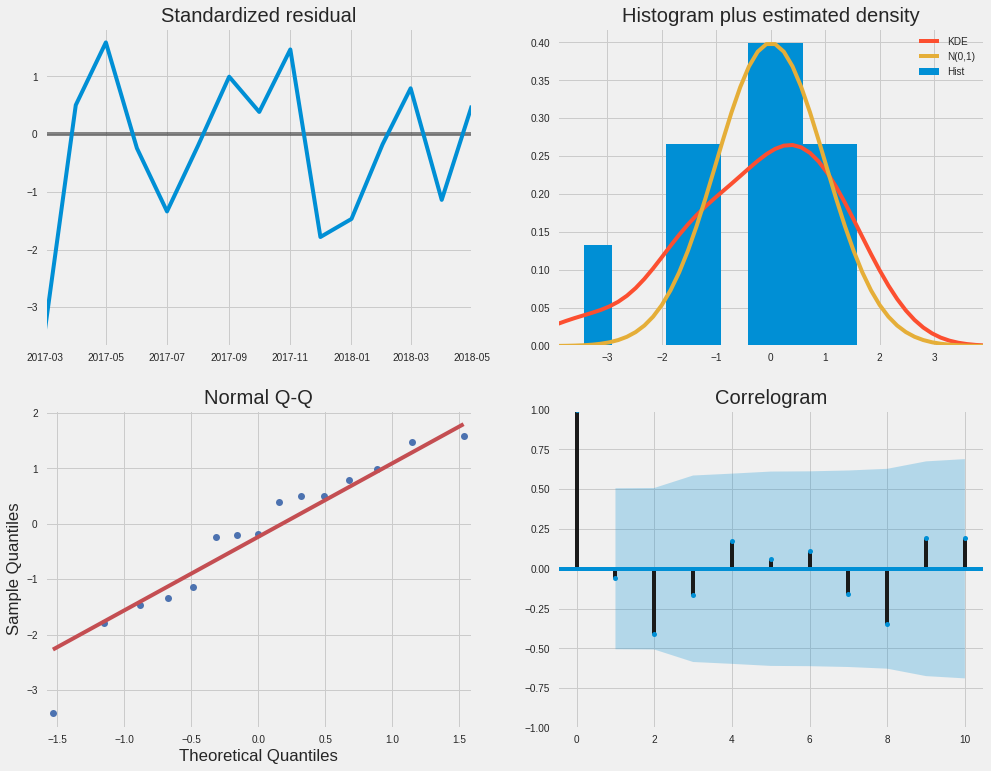

In [17]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

#  Realizo la predicción sobre los datos de entrenamiento para ver como se comporta

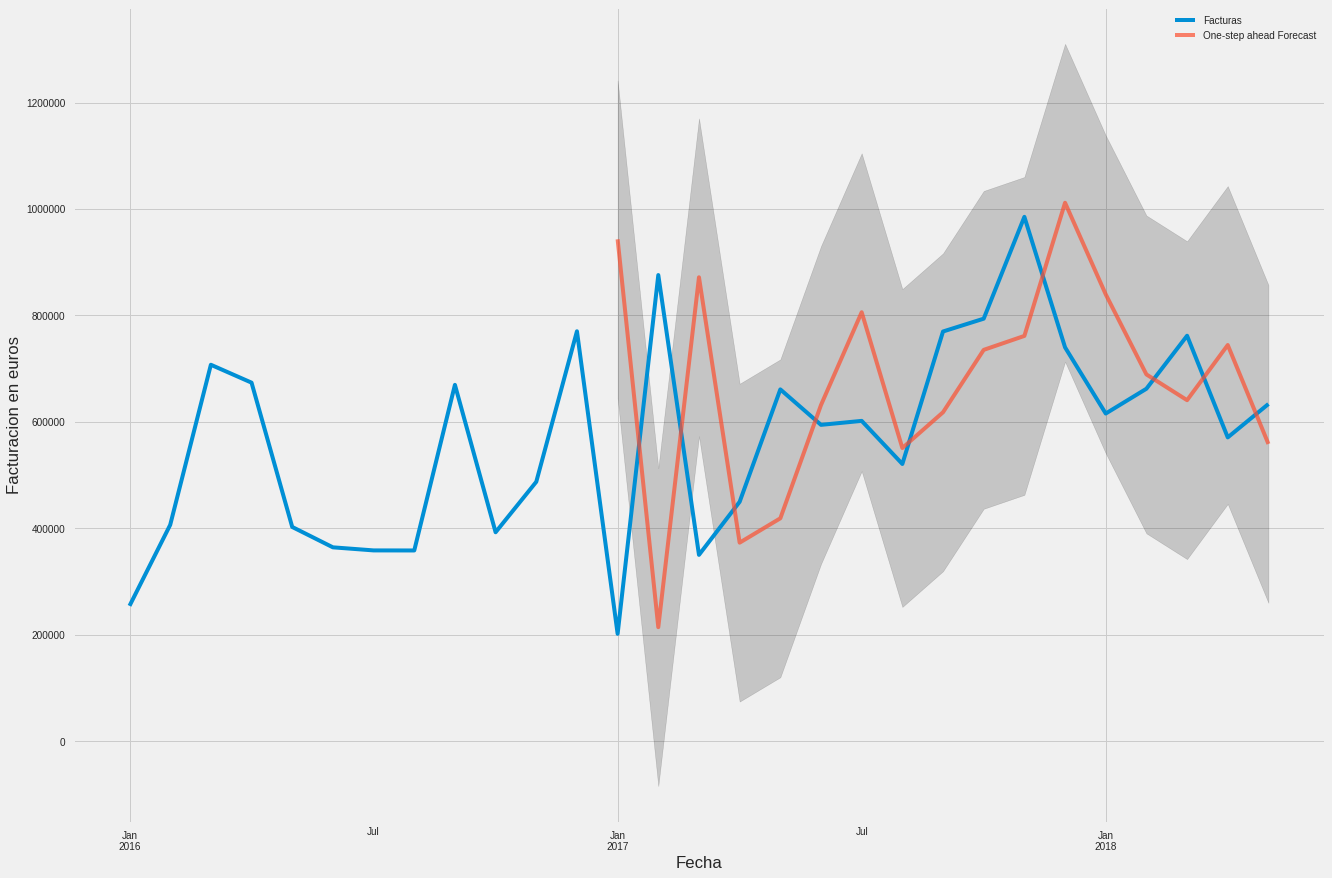

In [18]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'))
# Dynamic predictions

#pred = results.get_prediction(dynamic='2016-01-01')

pred_ci = pred.conf_int()

# Dynamic predictions



ax = y['2016-01-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Fecha')
ax.set_ylabel('Facturacion en euros')
plt.legend()

plt.show()

# Realizo mi predicción de facturación a futuro

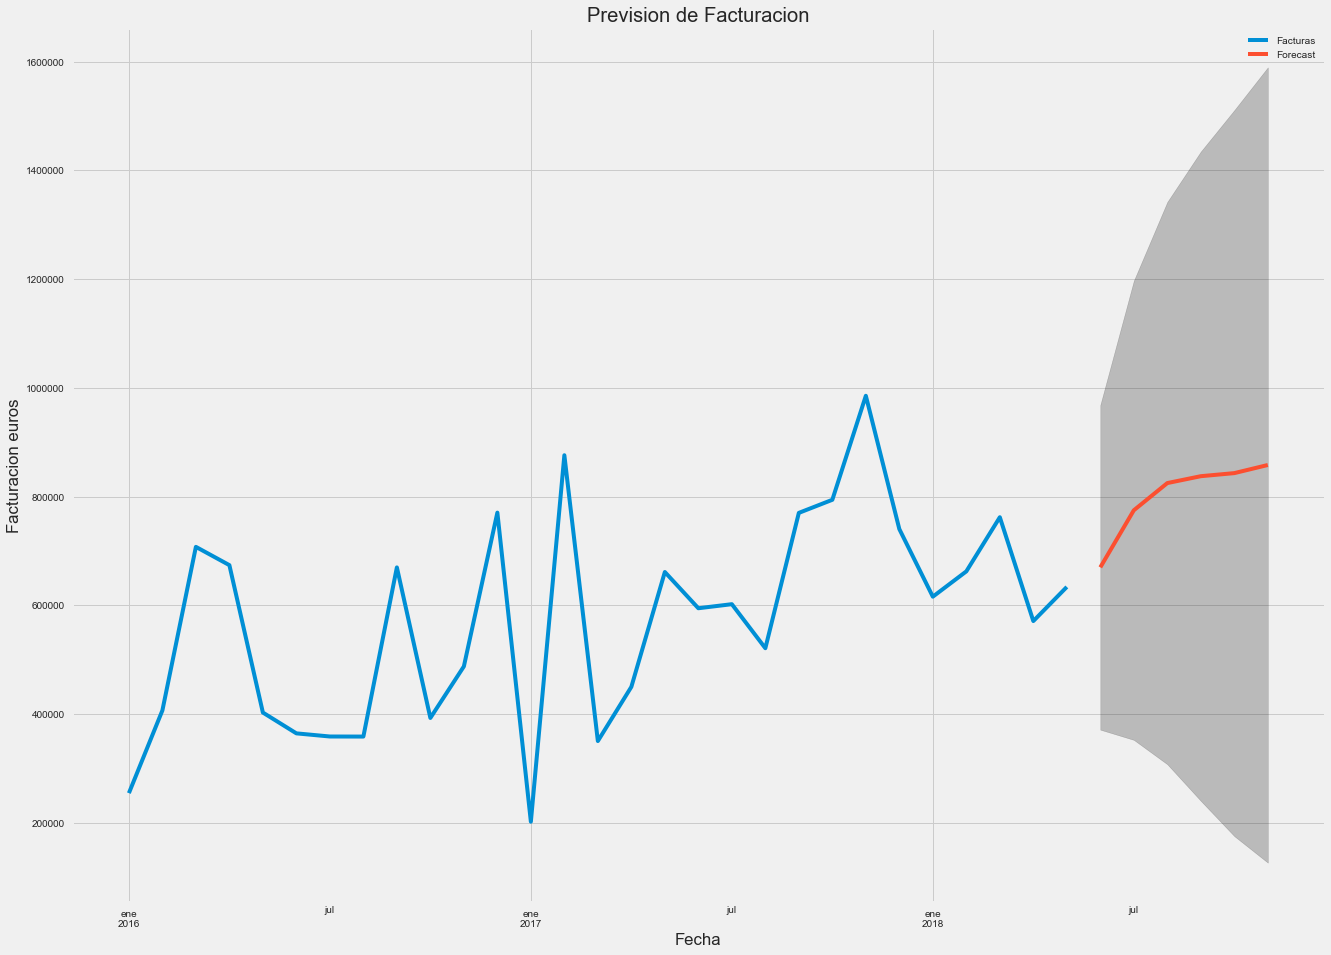

In [0]:
# Get forecast steps ahead in future
pred_uc = results.get_forecast(steps=6)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observado', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_title('Prevision de Facturacion')
ax.set_ylabel('Facturacion euros')

plt.legend()
plt.show()